In [1]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py
import os, glob
import time
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from textwrap import wrap
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XES_functions import *

import warnings
warnings.filterwarnings('ignore')

# Table of Contents:
### For raw data
* [Reduce and plot single run (optional: with rotation)](#Load_one_run)
* [Reduce several runs (optional: with rotation)](#Stack_more_runs)

### For reduced data
* [Find rotation angle](#Rotation_angle)
* [Load reduced spectra](#Load_stack)





<a id='Load_one_run'></a>
## Reduce and plot single run

In [3]:
pgroup='p20222'
runnumber = 424
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
#jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
jsonfile = glob.glob('/sf/alvra/data/{}/work/reduced_data/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
titlestring = str( pgroup + ' --- ' +jsonfile.split('/')[-3])
print (jsonfile)
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
if scan.parameters['scan_name'] != 'dummy':
    if scan.parameters['units'] == ['fs']:
        Timezero_mm = get_timezero_NBS(jsonfile)
        scanvar = scan.readbacks - mm2fs(Timezero_mm, 0)
    else: 
        scanvar = scan.readbacks
    print ('Scan contains {} step(s), scanvar goes from {:.2f} to {:.2f} {}'.format(len(scan), scanvar[0], scanvar[-1], scan.parameters['units'][0]))
else:
    print ('No motors moved')

run: 0424
/sf/alvra/data/p20222/work/reduced_data/run0424-FebpyCN4_ISO_3_4uJ_short_005/meta/scan.json
Scan contains 41 step(s), scanvar goes from -497.68 to 1502.37 fs


In [6]:
threshold_low = 3
threshold_high = 15

Timezero_mm = 100.02694

channels_list = []

saveflag = False
reducedir='../Claudio/Reduced_XES_timescans_TT_rot/'

rotflag = False
angle_file= '../Claudio/Reduced_XES_timescans_TT/_stacks/run0308-FebpyCN4_H20_4uJ_mixGain_stack_20_runs/angle_mean_rot.pkl'

TT = TT_PSEN126
Timezero_mm = 100.02694
channel_delay_motor = channel_delay_topas

#####################################################

import sfdata.sfdatafile
#sfdata.sfdatafile.ju = None
#scan = SFScanInfo(jsonfile)

try:
    Timezero_mm = get_timezero_NBS(jsonfile)
    flag = True
except:        
    Timezero_mm = Timezero_mm
    flag = False
    
angle_mean = {}
angle_mean = defaultdict(int, angle_mean)
if rotflag:
    with open(angle_file, 'rb') as f:
        angle_mean = pickle.load(f)
    
Delays_fs_scan, Delays_corr_scan, spectra_shots_on, spectra_shots_off, thrs_on, thrs_off, ROIs, Delay_fs, Delay_mm, meta = \
XES_delayscan_TT_ROIs(scan, channels_list, TT, channel_delay_motor, Timezero_mm, threshold_low, threshold_high, angle_rot=angle_mean)

print ('------------------------------')
if flag:
    print ('Timezero found in file = {} mm'.format(Timezero_mm))
else:
    print ('Timezero = {} mm'.format(Timezero_mm))

if scan.parameters['units'] == ['nS']:
    Delay_fs = scan.values
#    Delay_fs = Delay_fs - 0.17
else:
    Delay_fs = scan.values
    Delay_fs = Delay_fs - mm2fs(Timezero_mm, 0)
    
s_all_on, s_all_off = unwrap_spectra(ROIs, len(scan), spectra_shots_on, spectra_shots_off)
t_all_on, t_all_off = unwrap_spectra(ROIs, len(scan), thrs_on, thrs_off)
    
run_name = jsonfile.split('/')[-3]
if saveflag:
    os.makedirs(reducedir+run_name, exist_ok=True)
    save_data_XES_timescans_ROIs_TT(reducedir, run_name, s_all_on, s_all_on, t_all_on, t_all_off, ROIs, Delays_fs_scan, Delays_corr_scan, meta, run_name)    

for ROI in ROIs:
    if "bkg" in ROI:
        continue
    print ('Reduced {} data rotated by {}'.format(ROI, angle_mean[ROI]))

Processing: run0424-FebpyCN4_ISO_3_4uJ_short_005
Step 41 of 41: Processing acq0041

--------------------------------------------------------------------------------

JF02T09V03:ROI_KaDW                      1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaDW_bkg                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaUP                      1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaUP_bkg                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbDW                      1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbDW_bkg                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbUP                      1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbUP_bkg                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAR-CVME-TIFALL5:EvtSet                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.edge_amplitude        1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.edge_derivative       1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-S

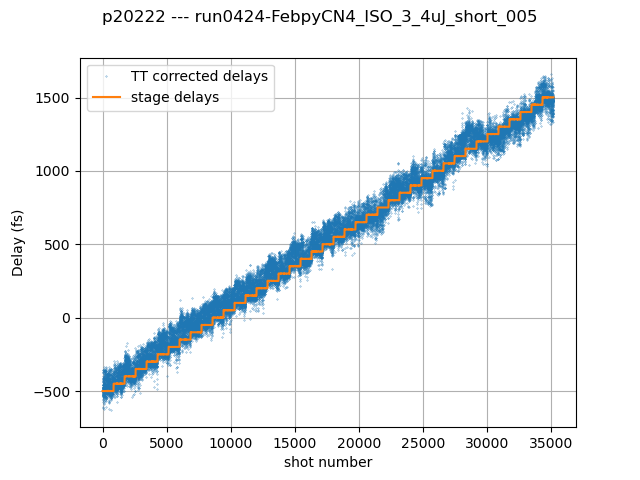

In [7]:
plt.figure()
plt.suptitle(titlestring)
plt.plot(Delays_corr_scan, '.',ms=0.5, label = 'TT corrected delays')
plt.plot(Delays_fs_scan, label = 'stage delays')
plt.xlabel('shot number')
plt.ylabel('Delay (fs)')
plt.legend (loc='best')
plt.grid()
plt.show()

### variable binsize...

In [60]:
numbins = 200

chosen_delays = np.array(Delays_corr_scan)
#chosen_delays = np.array(Delays_fs_scan)

#####################################################################################################
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin),
                     np.arange(npt),
                     np.sort(x))

binList = histedges_equalN(chosen_delays, numbins)

bin_centres = (binList[:-1] + binList[1:])/2
Delay_fs_TT = np.copy(bin_centres)

### ... or fix binsize with a range

In [87]:
binsize = 100

min_delay = -500
max_delay = 1500

#####################################################################################################

binList = np.arange(min_delay, max_delay, binsize)
bin_centres = (binList[:-1] + binList[1:])/2
Delay_fs_TT = np.arange(min_delay + binsize/2, max_delay - binsize/2, binsize)


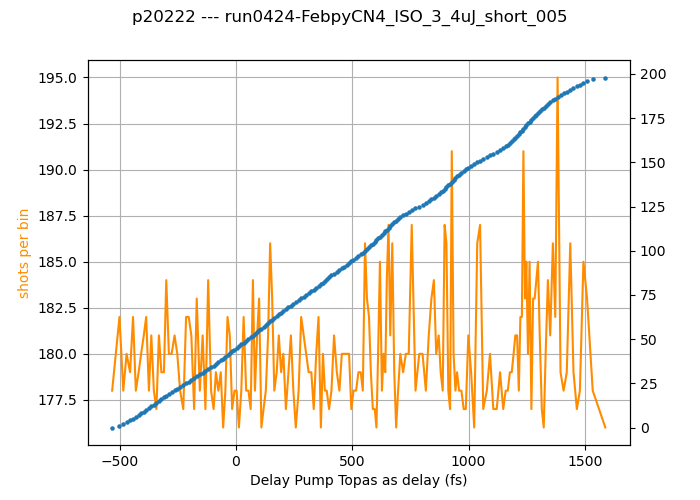

In [61]:
s_rebin_on = {}
s_rebin_off = {}

for j,ROI in enumerate(ROIs):
    ROI_size = np.array(meta[ROI+'-roi'])[1][1]-np.array(meta[ROI+'-roi'])[1][0]
    
    temp_s_on  = np.array(s_all_on[ROI])[:,:ROI_size]
    temp_s_off  = np.array(s_all_off[ROI])[:,:ROI_size]
    
    spec_rebin_on   = np.zeros((len(bin_centres), ROI_size)) 
    spec_rebin_off  = np.zeros((len(bin_centres), ROI_size))
    howmany = []
    for i in range(len(bin_centres)):
        specs_off_per_bin = len(temp_s_off) // len(bin_centres)
        cond1 = chosen_delays >= binList[i]
        cond2 = chosen_delays < binList[i+1]

        idx = np.where(cond1*cond2)[0]
        Delay_fs_TT[i] = np.average(chosen_delays[idx])
        howmany.append(len(idx))
        
        spec_rebin_on[i]  = np.average(temp_s_on[idx,:], axis=0)
        spec_rebin_off[i] = np.average(temp_s_off[i*specs_off_per_bin:specs_off_per_bin*(i+1),:], axis=0)
        
    s_rebin_on[ROI]   = spec_rebin_on
    s_rebin_off[ROI]  = spec_rebin_off

fig = plt.figure(figsize = (7,5))
fig.suptitle("\n".join(wrap(titlestring)))
ax1 = fig.add_subplot(111)
ax2 = plt.twinx(ax1)

delayrange = np.arange(0, len(Delay_fs_TT), 1)
ax1.plot(Delay_fs_TT, np.array(howmany), color = 'darkorange')
ax2.scatter(Delay_fs_TT, delayrange, s = 5)

ax1.set_xlabel('{} ({})'.format(scan.parameters['name'][0], scan.parameters['units'][0]))
ax1.set_ylabel('shots per bin', color='darkorange')
ax1.grid()
plt.show()

#os.makedirs(savedir, exist_ok=True)
#plt.savefig(savedir + '/' + 'bins_population.png')

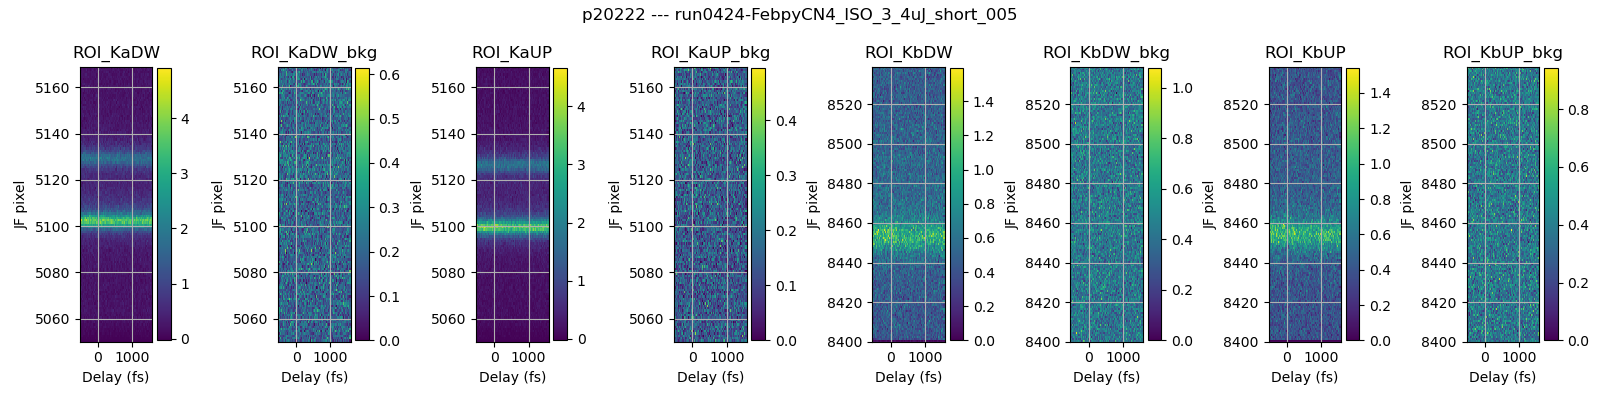

In [62]:
energy_calib = False

m = -5.430862659608205
b = 16537.553363439678

bin_ = 1

vmin = None
vmax = None

################################################

fig, axs = plt.subplots(nrows=1, ncols=len(ROIs), figsize=(16,4))
plt.suptitle(titlestring)
for i, (key, ax) in enumerate(zip(ROIs, axs.flatten())):
    matrix_on = s_rebin_on[key]
        
    yaxis = np.arange(np.array(meta[key+'-roi']).flatten()[-2], np.array(meta[key+'-roi']).flatten()[-1], 1)
    y_axis_rebin, matrix_on_rebin = plot_tool_static_2D(matrix_on, 0, yaxis, bin_)
    
    ylabel = 'JF pixel'
    if energy_calib:
        y_axis_rebin = (y_axis_rebin-b)/m
        ylabel = 'Emission energy (eV)'
        
    plt.sca(ax)
    plt.title(key.split(':')[-1])
    Z = np.transpose(np.asarray(matrix_on_rebin))
    plt.pcolormesh(Delay_fs_TT, y_axis_rebin, Z, vmin = vmin, vmax = vmax)
    #plt.plot(Delay_fs, np.transpose(np.asarray(matrix_off_rebin)).sum(axis=0))
    plt.colorbar()
    plt.ylabel(ylabel)
    #plt.ylim(3120, 3180)
    plt.grid()
    plt.xlabel('Delay ({})'.format(scan.parameters['units'][0]))
plt.tight_layout()

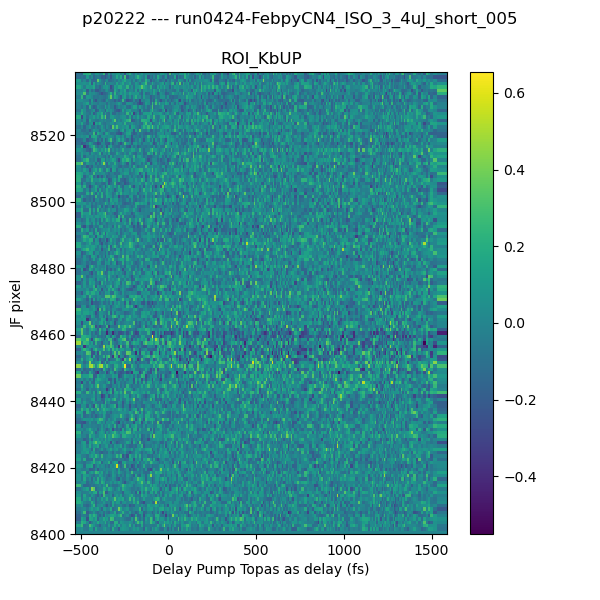

In [63]:
ROI = 'JF02T09V03:ROI_KbUP'

bin_ = 1

vmin = None
vmax = None

##########################################################
ROI_size = np.array(meta[ROI+'-roi'])[1][1]-np.array(meta[ROI+'-roi'])[1][0]
plt.figure(figsize=(6,6))
plt.suptitle(titlestring)

matrix_on = s_rebin_on[ROI]
matrix_off = np.asarray(s_all_off[ROI])[:,:ROI_size]

yaxis = np.arange(np.array(meta[ROI+'-roi']).flatten()[-2], np.array(meta[ROI+'-roi']).flatten()[-1], 1)
y_axis_rebin, matrix_on_rebin = plot_tool_static_2D(matrix_on, 0, yaxis, bin_)

plt.title(ROI.split(':')[-1])
#plt.plot(Delay_fs, (np.transpose(np.asarray(matrix_on_rebin) - np.asarray(matrix_off_rebin))[31]))

#plt.pcolormesh(Delay_fs, y_axis_rebin, np.transpose(np.asarray(matrix_on_rebin) - np.asarray(matrix_off_rebin)), vmin = vmin, vmax = vmax)
plt.pcolormesh(Delay_fs_TT, y_axis_rebin, np.transpose(np.asarray(matrix_on_rebin) - np.average(np.asarray(matrix_off), axis=0)), vmin = vmin, vmax = vmax)
#plt.pcolormesh(Delay_fs, y_axis_rebin, np.transpose(np.asarray(matrix_on_rebin)), vmin = vmin, vmax = vmax)
#plt.pcolormesh(Delay_fs, y_axis_rebin, np.transpose(np.asarray(matrix_off_rebin)), vmin = vmin, vmax = vmax)
plt.colorbar()
plt.ylabel(ylabel)
#plt.axhline(y = 5098, color = 'r', linestyle = '-')
#plt.axvline(x = 2.55, color = 'r', linestyle = '-')

plt.xlabel('{} ({})'.format(scan.parameters['name'][0], scan.parameters['units'][0]))
plt.show()

In [6]:
import pickle 
with open('../Claudio/Reduced_XES_timescans_TT_rot/angle_mean.pkl', 'rb') as f:
    angle_mean = pickle.load(f)
angle_mean

{'JF02T09V03:ROI_KaDW': 10.58672316384737,
 'JF02T09V03:ROI_KaUP': -12.700395480224069,
 'JF02T09V03:ROI_KbDW': 0.908418079100095,
 'JF02T09V03:ROI_KbUP': -0.9683615819171474}

<a id='Stack_more_runs'></a>
## Stacking several runs

In [4]:
pgroup='p20222'

############## DMA runs ###########################
# runlist1 = np.arange(790, 800, 1)
# runlist2 = np.arange(810, 825, 1)
# runlist3 = np.arange(830, 835, 1)
# runlist = np.concatenate((runlist1, runlist2, runlist3))

############## water runs #########################
#runlist = np.arange(308, 328, 1)

############## ISO runs ###########################
# runlist1 = np.arange(420, 425, 1)
# runlist2 = np.arange(431, 436, 1)
# runlist3 = np.arange(441, 446, 1)
# runlist = np.concatenate((runlist1, runlist2, runlist3))

#runlist = np.arange(466, 476, 1)

############## DMA:H20, ISO-like runs #############
runlist1 = np.arange(515, 520, 1)
runlist2 = np.arange(500, 520, 1)
runlist3 = np.arange(530, 540, 1)
runlist = np.concatenate((runlist1, runlist2, runlist3))

###################################################
from sfdata import SFScanInfo

print ('Requested {} run{}'.format(len(runlist), "" if len(runlist) == 1 else "s", runlist))
#titlestring = str(pgroup + ' --- ' +jsonfile.split('/')[-3])
titlestring_stack = pgroup + ' --- ' +str(runlist)

datafiles = []
#print (runlist)
for run in runlist:
    file = glob.glob('/sf/alvra/data/{}/work/reduced_data/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
    #file = glob.glob('/sf/alvra/data/{}/work/reduced_data/*{:04d}*/'.format(run))
    datafiles.append(file)
#datafiles = sorted(datafiles, key = os.path.getmtime)
datafiles = sorted(datafiles)
print ('{} files found:'.format(len(datafiles)))
datafiles      


Requested 5 runs
5 files found:


['/sf/alvra/data/p20222/work/reduced_data/run0515-FebpyCN4_DMA_Water_1_4uJ_001/meta/scan.json',
 '/sf/alvra/data/p20222/work/reduced_data/run0516-FebpyCN4_DMA_Water_1_4uJ_002/meta/scan.json',
 '/sf/alvra/data/p20222/work/reduced_data/run0517-FebpyCN4_DMA_Water_1_4uJ_003/meta/scan.json',
 '/sf/alvra/data/p20222/work/reduced_data/run0518-FebpyCN4_DMA_Water_1_4uJ_004/meta/scan.json',
 '/sf/alvra/data/p20222/work/reduced_data/run0519-FebpyCN4_DMA_Water_1_4uJ_005/meta/scan.json']

In [5]:
threshold_low = 3
threshold_high = 15

Timezero_mm = 100.02694

channels_list = []

saveflag = True
rotflag = True

angle_file= '../Claudio/Reduced_XES_timescans_TT/_stacks/run0485-FebpyCN4_DMAwater_1_2ps_4uJ_short_001_stack_40_runs/angle_mean_rot.pkl'
reducedir='../Claudio/Reduced_XES_timescans_TT_rot/'

TT = TT_PSEN126
Timezero_mm = 100.02694
channel_delay_motor = channel_delay_topas

#####################################################
import pickle
#import sfdata.sfdatafile
#sfdata.sfdatafile.ju = None

all_spectra_shots_on  = []
all_spectra_shots_off = []
all_thresholded_on    = []
all_thresholded_off   = []
all_delays_fs_scan    = []
all_delays_corr_scan  = []
counter = 0

angle_mean = {}
angle_mean = defaultdict(int, angle_mean)
if rotflag:
    with open(angle_file, 'rb') as f:
        angle_mean = pickle.load(f)

for jsonfile in datafiles:
    scan = SFScanInfo(jsonfile)
    counter += len(scan)
    try:
        Timezero_mm = get_timezero_NBS(jsonfile)
        flag = True
    except:        
        Timezero_mm = Timezero_mm
        flag = False

    Delays_fs_scan, Delays_corr_scan, spectra_shots_on, spectra_shots_off, thrs_on, thrs_off, ROIs, Delay_fs, Delay_mm, meta = \
    XES_delayscan_TT_ROIs(scan, channels_list, TT, channel_delay_motor, Timezero_mm, threshold_low, threshold_high, angle_rot=angle_mean)
    
    s_all_on, s_all_off = unwrap_spectra(ROIs, len(scan), spectra_shots_on, spectra_shots_off)
    t_all_on, t_all_off = unwrap_spectra(ROIs, len(scan), thrs_on, thrs_off)
    
    run_name = jsonfile.split('/')[-3]
    if saveflag:
        os.makedirs(reducedir+run_name, exist_ok=True)
        save_data_XES_timescans_ROIs_TT(reducedir, run_name, s_all_on, s_all_off, t_all_on, t_all_off, ROIs, Delays_fs_scan, Delays_corr_scan, meta, run_name) 
    
    all_spectra_shots_on.extend(spectra_shots_on)
    all_spectra_shots_off.extend(spectra_shots_off)
    all_thresholded_on.extend(thrs_on)
    all_thresholded_off.extend(thrs_off)
    all_delays_fs_scan.extend(Delays_fs_scan)
    all_delays_corr_scan.extend(Delays_corr_scan)

    print ('------------------------------')
    if flag:
        print ('Timezero found in file = {} mm'.format(Timezero_mm))
    else:
        print ('Timezero = {} mm'.format(Timezero_mm))

    if scan.parameters['units'] == ['nS']:
        Delay_fs = scan.values
    #    Delay_fs = Delay_fs - 0.17
    else:
        Delay_fs = scan.values
        Delay_fs = Delay_fs - mm2fs(Timezero_mm, 0)
        
all_delays_corr_scan = np.asarray(all_delays_corr_scan)
all_spectra_shots_on = np.asarray(all_spectra_shots_on)
all_spectra_shots_off = np.asarray(all_spectra_shots_off)
all_delays_fs_scan = np.asarray(all_delays_fs_scan)

for ROI in ROIs:
    if "bkg" in ROI:
        continue
    print ('Reduced {} data rotated by {}'.format(ROI, angle_mean[ROI]))

Processing: run0519-FebpyCN4_DMA_Water_1_4uJ_005
Step 42 of 42: Processing acq0042

--------------------------------------------------------------------------------

JF02T09V03:ROI_KaDW                      1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaDW_bkg                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaUP                      1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaUP_bkg                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbDW                      1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbDW_bkg                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbUP                      1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbUP_bkg                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAR-CVME-TIFALL5:EvtSet                  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.edge_amplitude        1000 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.edge_derivative       1000 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-S

### save all shots stacked spectra

In [6]:
pgroup = 'p20222'
Loaddir = '../Claudio/Reduced_XES_timescans_TT_rot/'

############## DMA runs ###########################
# runlist1 = np.arange(790, 800, 1)
# runlist2 = np.arange(810, 825, 1)
# runlist3 = np.arange(830, 835, 1)
# # #runlist4 = np.arange(466, 476, 1)
# runlist = np.concatenate((runlist1, runlist2, runlist3))

############## water runs ###########################
#runlist = np.arange(308, 328, 1)

############## ISO runs ###########################
# runlist1 = np.arange(420, 425, 1)
# runlist2 = np.arange(431, 436, 1)
# runlist3 = np.arange(441, 446, 1)
# runlist = np.concatenate((runlist1, runlist2, runlist3))

#runlist = np.arange(466, 476, 1)

############## DMA:H20, ISO-like runs #############
runlist1 = np.arange(485, 495, 1)
runlist2 = np.arange(500, 520, 1)
runlist3 = np.arange(530, 540, 1)
runlist = np.concatenate((runlist1, runlist2, runlist3))

##################################################
from collections import defaultdict
s_all_on  = defaultdict(list) # ROI/N-shots
s_all_off = defaultdict(list) # ROI/N-shots
all_delays_fs_scan = []
all_delays_corr_scan = []

for i, run in enumerate(runlist):
    folder = glob.glob(Loaddir + '*{:04d}*'.format(run))[0]
    print ('{}/{}: Open data from {}'.format(i+1, len(runlist), folder))
    run_array = np.load(folder + '/run_array.npy', allow_pickle=True).item()
    for key in run_array.keys():
        meta = run_array[key]["meta"]
        ROIs      = run_array[key]["ROIs"]
        s_all_run_on  = run_array[key]["all_spectra_shots_on"]
        s_all_run_off = run_array[key]["all_spectra_shots_off"]
        all_delays_fs_scan.extend(run_array[key]["all_delays_fs_scan"])
        all_delays_corr_scan.extend(run_array[key]["all_delays_corr_scan"])
        for ROI in ROIs:
            s_all_on[ROI].extend(s_all_run_on[ROI])
            s_all_off[ROI].extend(s_all_run_off[ROI])
            
all_delays_corr_scan = np.asarray(all_delays_corr_scan)
all_delays_fs_scan = np.asarray(all_delays_fs_scan)

folder0 = glob.glob(Loaddir + '*{:04d}*'.format(runlist[0]))[0].split('/')[-1]
reducedir = Loaddir 
run_name = '/_stacks/'+'{}_stack_{}_runs/'.format(folder0,len(runlist))
os.makedirs(reducedir+run_name, exist_ok=True)
save_data_XES_timescans_ROIs_TT_stack(reducedir, run_name, s_all_on, s_all_off, ROIs, all_delays_fs_scan, all_delays_corr_scan, meta, runlist)   

1/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0485-FebpyCN4_DMAwater_1_2ps_4uJ_short_001
2/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0486-FebpyCN4_DMAwater_1_2ps_4uJ_short_002
3/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0487-FebpyCN4_DMAwater_1_2ps_4uJ_short_003
4/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0488-FebpyCN4_DMAwater_1_2ps_4uJ_short_004
5/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0489-FebpyCN4_DMAwater_1_2ps_4uJ_short_005
6/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0490-FebpyCN4_DMAwater_1_2ps_4uJ_short_001
7/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0491-FebpyCN4_DMAwater_1_2ps_4uJ_short_002
8/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0492-FebpyCN4_DMAwater_1_2ps_4uJ_short_003
9/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0493-FebpyCN4_DMAwater_1_2ps_4uJ_short_004
10/40: Open data from ../Claudio/Redu

<a id='Rotation_angle'></a>
## Load all single-shots darks to find the rotation angle

In [6]:
pgroup = 'p20222'
Loaddir = '../Claudio/Reduced_XES_timescans_TT_rot/'

############## DMA runs ###########################
# runlist1 = np.arange(790, 800, 1)
# runlist2 = np.arange(810, 825, 1)
# runlist3 = np.arange(830, 835, 1)
# # #runlist4 = np.arange(466, 476, 1)
# runlist = np.concatenate((runlist1, runlist2, runlist3))

############## water runs ###########################
#runlist = np.arange(308, 328, 1)

############## ISO runs ###########################
# runlist1 = np.arange(420, 425, 1)
# runlist2 = np.arange(431, 436, 1)
# runlist3 = np.arange(441, 446, 1)
# runlist = np.concatenate((runlist1, runlist2, runlist3))

#runlist = np.arange(466, 476, 1)

############## DMA:H20, ISO-like runs #############
runlist1 = np.arange(485, 495, 1)
runlist2 = np.arange(500, 520, 1)
runlist3 = np.arange(530, 540, 1)
runlist = np.concatenate((runlist1, runlist2, runlist3))

###################################################
from collections import defaultdict
t_all_off = defaultdict(list) # ROI/N-shots

for i, run in enumerate(runlist):
    folder = glob.glob(Loaddir + '*{:04d}*'.format(run))[0]
    print ('{}/{}: Open data from {}'.format(i+1, len(runlist), folder))
    run_array = np.load(folder + '/run_array.npy', allow_pickle=True).item()
    for key in run_array.keys():
        ROIs      = run_array[key]["ROIs"]
        t_all_run = run_array[key]["all_thresholds_off"]    
        for ROI in ROIs:          
            t_all_off[ROI].extend(t_all_run[ROI])
for ROI in ROIs:
    print (ROI, np.shape(t_all_off[ROI]))
titlestring_stack = pgroup + ' --- ' +str(runlist)

1/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0485-FebpyCN4_DMAwater_1_2ps_4uJ_short_001
2/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0486-FebpyCN4_DMAwater_1_2ps_4uJ_short_002
3/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0487-FebpyCN4_DMAwater_1_2ps_4uJ_short_003
4/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0488-FebpyCN4_DMAwater_1_2ps_4uJ_short_004
5/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0489-FebpyCN4_DMAwater_1_2ps_4uJ_short_005
6/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0490-FebpyCN4_DMAwater_1_2ps_4uJ_short_001
7/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0491-FebpyCN4_DMAwater_1_2ps_4uJ_short_002
8/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0492-FebpyCN4_DMAwater_1_2ps_4uJ_short_003
9/40: Open data from ../Claudio/Reduced_XES_timescans_TT_rot/run0493-FebpyCN4_DMAwater_1_2ps_4uJ_short_004
10/40: Open data from ../Claudio/Redu

### Angle for 1 ROI

100%|██████████| 238/238 [01:25<00:00,  2.77it/s]

Done in 85.81 seconds


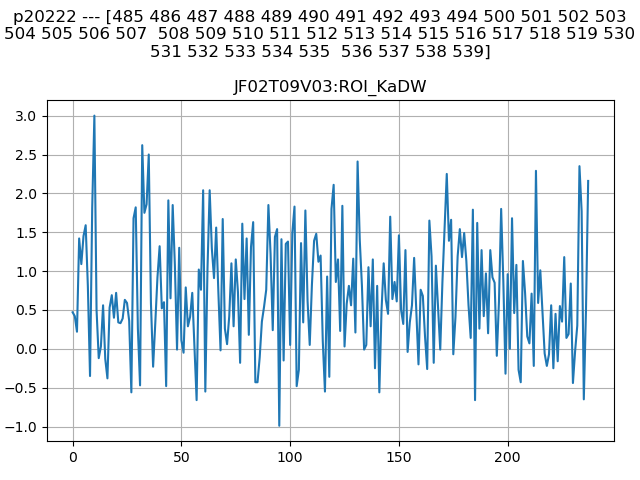

In [12]:
img_per_bin = 1100
ROI = 'JF02T09V03:ROI_KaDW'

ang_fit = []
imgs_all = []
numbins = len(t_all_off[ROI]) // img_per_bin
from tqdm import tqdm
clock_int = clock.Clock()
t = clock_int.tick()
for i in tqdm(range(numbins)):
#for i in range(numbins):
    clear_output(wait=True)
    imgs_temp = t_all_off[ROI][i*img_per_bin:img_per_bin*(i+1)-1]
    imgs_rebin = np.average(imgs_temp, axis=0)
    imgs_all.append(imgs_rebin)
    _, a_fit = get_angle_rotation(ROI, imgs_rebin, -25, 25, 5)
    ang_fit.append(a_fit)
print ('Done in {} seconds'.format(clock_int.tock() - t))
plt.figure()
plt.suptitle("\n".join(wrap(titlestring_stack)))
plt.title(ROI)
plt.grid()
plt.tight_layout()
plt.plot(ang_fit)
plt.show()


### Angles for all ROIs

In [13]:
img_per_bin = 1100

ang_fit = []

a_ROI = {}
angle_mean = {}
from tqdm import tqdm
clock_int = clock.Clock()
for ROI in ROIs:
    t = clock_int.tick()
    if 'bkg' in ROI:
        continue
    #print ('Doing ROI: {}'.format(ROI))
    numbins = len(t_all_off[ROI]) // img_per_bin

    ang_fit = []
    #for i in range(numbins):
    for i in tqdm(range(numbins)):
        print ('Doing ROI: {}'.format(ROI))
        clear_output(wait=True)
        #print ('{}/{} averaging {}/{} shots'.format(i+1, numbins, img_per_bin, len(t_all_off[ROI])))
        imgs_rebin = np.average(t_all_off[ROI][i*img_per_bin:img_per_bin*(i+1)], axis=0)
        _, a_fit = get_angle_rotation(ROI, imgs_rebin, -25, 25, 5)
        ang_fit.append(a_fit)
    a_ROI[ROI] = ang_fit
    angle_mean[ROI] = np.mean(a_ROI[ROI])
    print ('Done in {} seconds'.format(clock_int.tock() - t))

100%|██████████| 238/238 [13:24<00:00,  3.38s/it]

Done in 2243.67 seconds


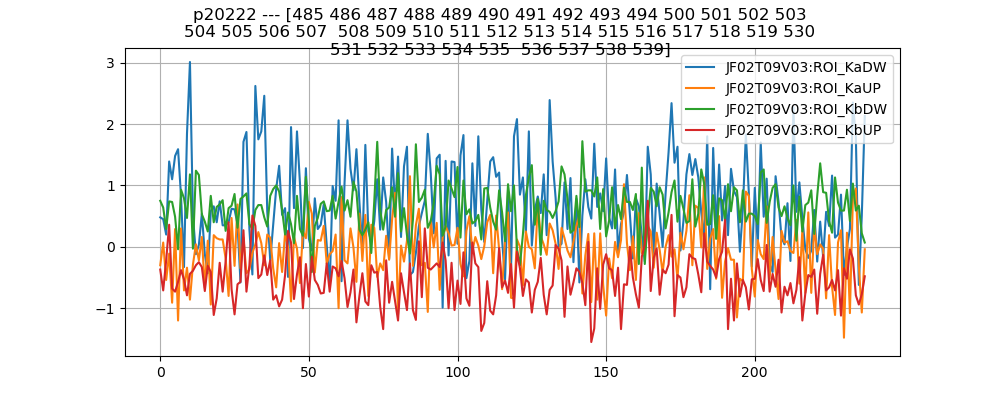

In [14]:
plt.figure(figsize=(10,4))
from textwrap import wrap
plt.suptitle("\n".join(wrap(titlestring_stack)))
for ROI in ROIs:
    if 'bkg' in ROI:
        continue
    plt.plot(a_ROI[ROI], label=ROI)
plt.legend (loc='best')
plt.grid()
plt.show()

#plt.savefig('../Claudio/PNG/run0790-FebpyCN4_DMA_7uJ_short_001_stack_30_runs/angles_rotated.png')

In [12]:
import pickle 

with open('../Claudio/Reduced_XES_timescans_TT/_stacks/run0485-FebpyCN4_DMAwater_1_2ps_4uJ_short_001_stack_40_runs/angle_mean_rot.pkl', 'wb') as f:
    pickle.dump(angle_mean, f)

<a id='Load_stack'></a>
## Load reduced stacked data (single file!)

In [43]:
pgroup = 'p20222'
Loaddir = '../Claudio/Reduced_XES_timescans_TT_rot/_stacks/run0308-FebpyCN4_H20_4uJ_mixGain_stack_20_runs/'
run2load = Loaddir.split('/')[-2]

titlestring_stack = run2load
savedir = '../Claudio/PNG/'+run2load #+'_rot'
run_array = np.load(Loaddir + 'run_array.npy', allow_pickle=True).item()
for key in run_array.keys():
    s_all_off = run_array[key]["all_spectra_shots_off"]
    s_all_on  = run_array[key]["all_spectra_shots_on"]
    ROIs      = run_array[key]["ROIs"]
    all_delays_fs_scan = run_array[key]["all_delays_fs_scan"]
    all_delays_corr_scan = run_array[key]["all_delays_corr_scan"]
    meta = run_array[key]["meta"]
    if len(run_array[key]["runlist"]) != 0:        
        runlist = run_array[key]["runlist"]
        titlestring_stack = pgroup + ' --- ' +str(runlist)

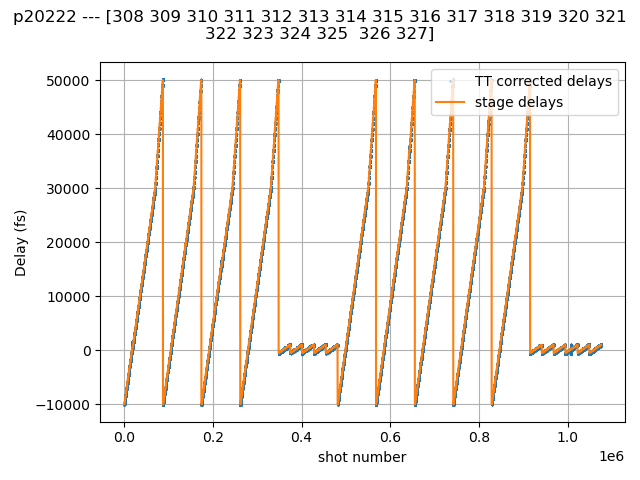

In [44]:
plt.figure()
from textwrap import wrap
plt.suptitle("\n".join(wrap(titlestring_stack)))
plt.plot(all_delays_corr_scan, '.',ms=0.5, label = 'TT corrected delays')
plt.plot(all_delays_fs_scan, label = 'stage delays')
plt.xlabel('shot number')
plt.ylabel('Delay (fs)')
plt.legend (loc='best')
plt.tight_layout()
plt.grid()
plt.show()

## Choose variable binsize...

In [45]:
numbins = 200

#####################################################################################################
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin),
                     np.arange(npt),
                     np.sort(x))

binList = histedges_equalN(all_delays_corr_scan, numbins)
bin_centres = (binList[:-1] + binList[1:])/2
all_Delay_fs_TT = np.copy(bin_centres)


## ... or a fix binsize with a range

In [361]:
binsize = 500

min_delay = -5000
max_delay = 30000

#####################################################################################################

#binList = np.arange(all_delays_fs_scan[0]-10, all_delays_fs_scan[-1]+10, binsize)
#all_Delay_fs_TT = np.arange(all_delays_fs_scan[0]-10 + binsize/2, all_delays_fs_scan[-1]+10 - binsize/2, binsize)

binList = np.arange(min_delay, max_delay, binsize)
bin_centres = (binList[:-1] + binList[1:])/2
all_Delay_fs_TT = np.arange(min_delay + binsize/2, max_delay - binsize/2, binsize)
#all_Delay_fs_TT = np.arange(min_delay, max_delay, binsize)


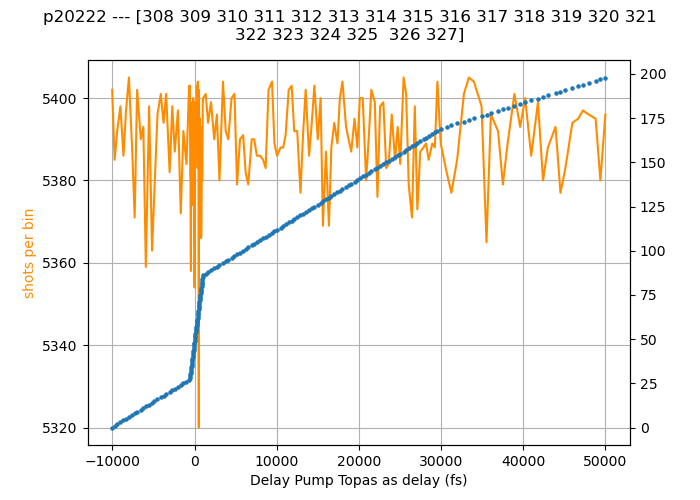

In [48]:
all_s_rebin_on = {}
all_s_rebin_off = {}

for j,ROI in enumerate(ROIs):
    ROI_size = np.array(meta[ROI+'-roi'])[1][1]-np.array(meta[ROI+'-roi'])[1][0]
    
    temp_s_on  = np.array(s_all_on[ROI])[:,:ROI_size]
    temp_s_off  = np.array(s_all_off[ROI])[:,:ROI_size]
    
    all_spec_rebin_on   = np.zeros((len(bin_centres), ROI_size)) 
    all_spec_rebin_off  = np.zeros((len(bin_centres), ROI_size))
    howmany = []
    for i in range(len(bin_centres)):
        specs_off_per_bin = len(temp_s_off) // len(bin_centres)
        cond1 = all_delays_corr_scan > binList[i]
        cond2 = all_delays_corr_scan < binList[i+1]

        idx = np.where(cond1*cond2)[0]
        all_Delay_fs_TT[i] = np.average(all_delays_corr_scan[idx])
        howmany.append(len(idx))
        
        all_spec_rebin_on[i]  = np.average(temp_s_on[idx,:], axis=0)
        all_spec_rebin_off[i] = np.average(temp_s_off[i*specs_off_per_bin:specs_off_per_bin*(i+1),:], axis=0)
        
    all_s_rebin_on[ROI]   = all_spec_rebin_on
    all_s_rebin_off[ROI]  = all_spec_rebin_off

fig = plt.figure(figsize = (7,5))
fig.suptitle("\n".join(wrap(titlestring_stack)))
ax1 = fig.add_subplot(111)
ax2 = plt.twinx(ax1)

delayrange = np.arange(0, len(all_Delay_fs_TT), 1)
ax1.plot(all_Delay_fs_TT, np.array(howmany), color = 'darkorange')
ax2.scatter(all_Delay_fs_TT, delayrange, s = 5)

ax1.set_xlabel('{} ({})'.format(scan.parameters['name'][0], scan.parameters['units'][0]))
ax1.set_ylabel('shots per bin', color='darkorange')
ax1.grid()
plt.show()

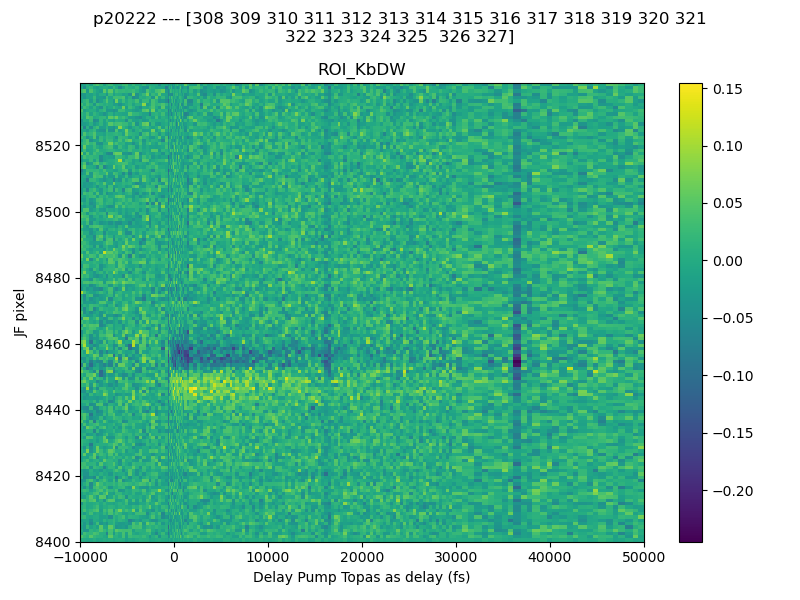

In [49]:
ROI = 'JF02T09V03:ROI_KbDW'

bin_ = 1

vmin = None
vmax = None

##########################################################
ROI_size = np.array(meta[ROI+'-roi'])[1][1]-np.array(meta[ROI+'-roi'])[1][0]
plt.figure(figsize=(8,6))
plt.suptitle("\n".join(wrap(titlestring_stack)))

all_Delay_fs_TT_noNans = np.copy(all_Delay_fs_TT)
all_Delay_fs_TT_noNans = all_Delay_fs_TT_noNans[~np.isnan(all_Delay_fs_TT)]

matrix_on = all_s_rebin_on[ROI]
matrix_on = matrix_on[~np.isnan(all_Delay_fs_TT),:]

matrix_off = np.asarray(s_all_off[ROI])[:,:ROI_size]
matrix_off2 = np.asarray(all_s_rebin_off[ROI])[:,:ROI_size]
#matrix_off = matrix_off[~np.isnan(all_Delay_fs_TT),:]

yaxis = np.arange(np.array(meta[ROI+'-roi']).flatten()[-2], np.array(meta[ROI+'-roi']).flatten()[-1], 1)
y_axis_rebin, matrix_on_rebin = plot_tool_static_2D(matrix_on, 0, yaxis, bin_)
y_axis_rebin, matrix_off_rebin = plot_tool_static_2D(matrix_off, 0, yaxis, bin_)
y_axis_rebin, matrix_off_rebin2 = plot_tool_static_2D(matrix_off2, 0, yaxis, bin_)

y_label = 'JF pixel'

plt.title(ROI.split(':')[-1])
pp_2D  = np.transpose(np.asarray(matrix_on_rebin) - np.average(np.asarray(matrix_off_rebin), axis=0))
on_2D  = np.transpose(np.asarray(matrix_on_rebin))
off_2D = np.transpose(np.asarray(matrix_off_rebin2))

plt.pcolormesh(all_Delay_fs_TT_noNans, y_axis_rebin, pp_2D, vmin = vmin, vmax = vmax)

plt.colorbar()
plt.ylabel(y_label)
#plt.axhline(y = 5098, color = 'r', linestyle = '-')
#plt.axvline(x = 2.55, color = 'r', linestyle = '-')

plt.xlabel('{} ({})'.format(scan.parameters['name'][0], scan.parameters['units'][0]))
plt.tight_layout()
plt.show()

#os.makedirs(savedir, exist_ok=True)
#plt.savefig(savedir + '/' + 'stack_{}_variable.png'.format(ROI.split(':')[-1]))

In [50]:
chosen_pixel = 8450
index_pixel = np.arange(len(y_axis_rebin))[(y_axis_rebin > chosen_pixel)][0]
index_pixel

51

In [53]:
savedir

'../Claudio/PNG/run0308-FebpyCN4_H20_4uJ_mixGain_stack_20_runs'

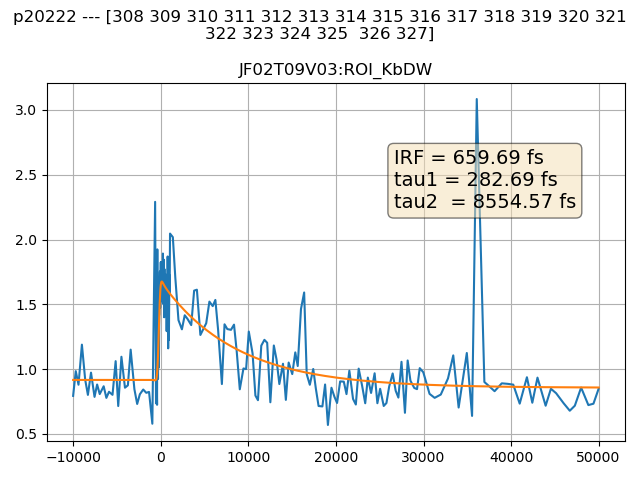

In [54]:
pp_int = np.sum(np.abs(pp_2D[index_pixel-15:index_pixel+15,:]), axis = 0)

# fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
# fit.estimate(all_Delay_fs_TT_noNans, pp_int)            # this sets some internal params 
# #fit.p0 = better_p0(fit.p0, 0, 210.42) # overwrite some values (index) if needed: 
# #fit.p0 = better_p0(fit.p0, 4, 250) # overwrite some values (index) if needed: 

# fit.fit(all_Delay_fs_TT_noNans, pp_int)                  # calculate the fit
# pp_fit = fit.eval(all_Delay_fs_TT_noNans)           # evaluate the curve for plotting
# width_fs = fit.popt[2]

p0 = [0, 0, 200, 1, 1000, 0.5, 1, 10000]
popt,_  = curve_fit(model_decay_2exp, all_Delay_fs_TT_noNans, pp_int, p0=p0, maxfev=40000)
y_fit = model_decay_2exp(all_Delay_fs_TT_noNans, *popt)


fig, ax = plt.subplots(constrained_layout=True)
plt.suptitle("\n".join(wrap(titlestring_stack)))
plt.title(ROI)
plt.plot(all_Delay_fs_TT_noNans, pp_int)
plt.plot(all_Delay_fs_TT_noNans, y_fit)


boxstyle = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
boxtext = '\n'.join((r'IRF = {:.2f} fs'.format(np.abs(popt[2]*2.3548)),
                     r'tau1 = {:.2f} fs'.format(np.abs(popt[4])),
                     r'tau2  = {:.2f} fs'.format(np.abs(popt[7]))))
plt.text(0.6, 0.65, boxtext, transform=ax.transAxes, bbox=boxstyle, fontsize=14)

plt.grid()
plt.tight_layout()
#plt.ylim(-0.25, 2)
plt.show()

# os.makedirs(savedir, exist_ok=True)
# plt.savefig(savedir + '/{}.png'.format(ROI.split(':')[-1]))

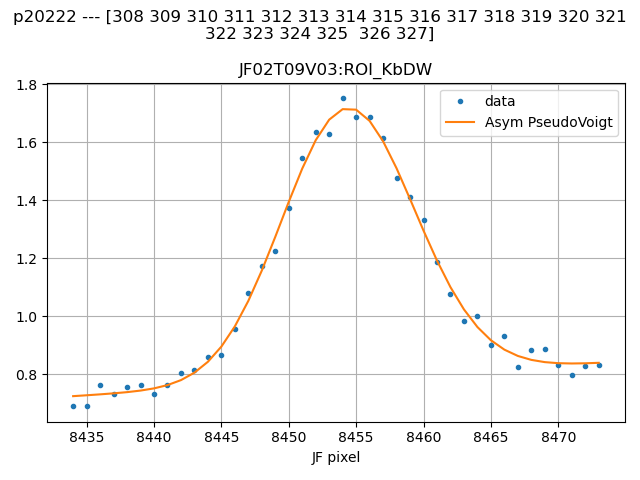

28.614304352649103
8454.863306675885


In [55]:
linewidth = 40 ## in pixels

######################################################################
from scipy.optimize import curve_fit
from lmfit.models import PseudoVoigtModel, VoigtModel, LorentzianModel
mod = PseudoVoigtModel()

line = on_2D[:,0]

#center2 = y_axis_rebin[(np.argmax(line))]
center = np.argmax(line)
liminf = center-np.int(linewidth/2)
limsup = center+np.int(linewidth/2)

line2fit = line[liminf:limsup]# - np.average(line[0:10])
axis2fit = y_axis_rebin[liminf:limsup] 

p0     = [y_axis_rebin[center], 10, 7, 0.5, 0.5, 0.0001, 0.1]
# p0_min = [0, 0, -1000, 0, -np.inf, -np.inf] # minimum bounds for each parameter16
# p0_max = [1, 1, 1000, 1, np.inf, np.inf] # maximum bounds for each parameter
# bounds = (p0_min, p0_max)

popt, pcov = curve_fit(AsymPseudoVoigt, axis2fit, line2fit, p0=p0, maxfev=40000)
y_fit = AsymPseudoVoigt(axis2fit, *popt)

pars = mod.guess(line2fit, x=axis2fit)
init = mod.eval(pars, x=axis2fit)
out = mod.fit(line2fit, center=y_axis_rebin[center], x=axis2fit)
    
plt.figure()
plt.suptitle("\n".join(wrap(titlestring_stack)))
plt.title(ROI)
plt.plot(axis2fit, line2fit,'.', label = 'data')
#plt.plot(axis2fit, out.best_fit, label = 'pseudoVoigt')
plt.plot(axis2fit, y_fit, label ='Asym PseudoVoigt')

plt.grid()
plt.xlabel(y_label)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print (out.params.get('fwhm').value)
print (out.params.get('center').value)

#plt.savefig(savedir + '/{}_fit.png'.format(ROI.split(':')[-1]))

In [56]:
from lmfit.models import PseudoVoigtModel, VoigtModel
mod = PseudoVoigtModel()

center_on = []
center_off = []
width_on = []
width_off = []

for index in range(len(all_Delay_fs_TT_noNans)):
    axis2fit = y_axis_rebin[liminf:limsup] 
    
    line_on = on_2D[:,index]
    line_off = off_2D[:,index]
    
    line2fit_on  = line_on[liminf:limsup]# - np.average(line_on[0:10])
    line2fit_off = line_off[liminf:limsup]# - np.average(line_off[0:10])

    p0_on  = [y_axis_rebin[center], 5, 10, 0.1, -1, 0.0001, 0.1]
    p0_off = [y_axis_rebin[center], 5, 10, 0.1, -1, 0.0001, 0.1]
    
    popt_on,_  = curve_fit(AsymPseudoVoigt, axis2fit, line2fit_on, p0=p0_on, maxfev=40000)
    popt_off,_ = curve_fit(AsymPseudoVoigt, axis2fit, line2fit_off, p0=p0_off, maxfev=40000)

    
#     pars_on = mod.guess(line2fit_on, x=axis2fit)
#     init_on = mod.eval(pars_on, x=axis2fit)
#     out_on = mod.fit(line2fit_on, center=y_axis_rebin[center], x=axis2fit)
    
#     pars_off = mod.guess(line2fit_off, x=axis2fit)
#     init_off = mod.eval(pars_off, x=axis2fit)
#     out_off = mod.fit(line2fit_off, center=y_axis_rebin[center], x=axis2fit)
    
    #width_on.append(out_on.params.get('fwhm').value)
    #center_on.append(out_on.params.get('center').value)
    
    width_on.append(popt_on[2])
    center_on.append(popt_on[0])
    
#     width_off.append(out_off.params.get('fwhm').value)
#     center_off.append(out_off.params.get('center').value)
    
    width_off.append(popt_on[2])
    center_off.append(popt_on[0])
    
    
width_on = np.asarray(width_on)
width_off = np.asarray(width_off)
center_on = np.asarray(center_on)
center_off = np.asarray(center_off)


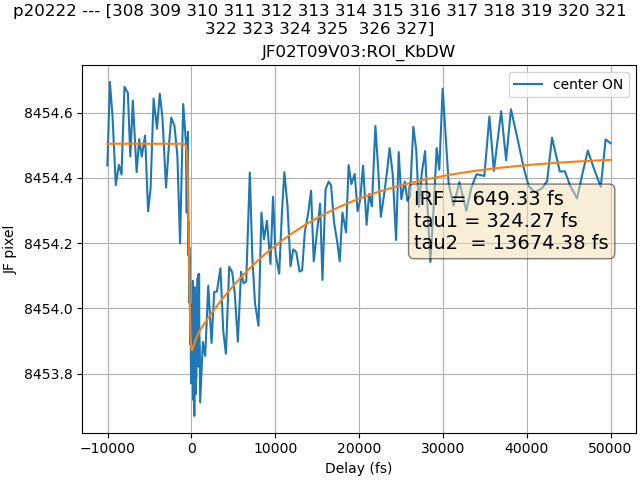

IRF = 649.3346773891058 fs
tau1 = 324.26635194319977 fs
tau2 = 13674.377355129423 fs


In [57]:

# fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
# fit.estimate(all_Delay_fs_TT_noNans, center_on)            # this sets some internal params 
# fit.p0 = better_p0(fit.p0, 0, -200) # overwrite some values (index) if needed: 
# #fit.p0 = better_p0(fit.p0, 4, 250) # overwrite some values (index) if needed: 

# fit.fit(all_Delay_fs_TT_noNans, center_on)                  # calculate the fit
# pp_fit = fit.eval(all_Delay_fs_TT_noNans)           # evaluate the curve for plotting

# width_fs = fit.popt[2]

###################### 1 exp #################################
# p0 = [0, 0, 200, -1, 10000, 8450]
# popt,_  = curve_fit(model_decay_1exp, all_Delay_fs_TT_noNans, center_on, p0=p0, maxfev=40000)
# y_fit = model_decay_1exp(all_Delay_fs_TT_noNans, *popt)

###################### 2 exp #################################
p0 = [0, 0, 200, -1, 1000, y_axis_rebin[center], -1, 10000]
popt,_  = curve_fit(model_decay_2exp, all_Delay_fs_TT_noNans, center_on, p0=p0, maxfev=40000)
y_fit = model_decay_2exp(all_Delay_fs_TT_noNans, *popt)

fig, ax = plt.subplots(constrained_layout=True)
plt.suptitle("\n".join(wrap(titlestring_stack)))
plt.title(ROI)

#plt.plot(all_Delay_fs_TT_noNans, width_on, label = 'width ON')
plt.plot(all_Delay_fs_TT_noNans, center_on, label = 'center ON')
plt.plot(all_Delay_fs_TT_noNans, y_fit)#, label = 'center ON')

#plt.plot(all_Delay_fs_TT_noNans, width_off, label = 'width OFF')
#plt.plot(all_Delay_fs_TT_noNans, np.asarray(width_on)-np.asarray(width_off), label = 'diff')
#plt.plot(all_Delay_fs_TT, pp_int, '--o')


boxstyle = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
boxtext = '\n'.join((r'IRF = {:.2f} fs'.format(np.abs(popt[2]*2.3548)),
                     r'tau1 = {:.2f} fs'.format(np.abs(popt[4])),
                     r'tau2  = {:.2f} fs'.format(np.abs(popt[7]))))
plt.text(0.6, 0.5, boxtext, transform=ax.transAxes, bbox=boxstyle, fontsize=14)


plt.xlabel ('Delay (fs)')
plt.ylabel(y_label)
plt.legend (loc = 'best')
plt.grid()
plt.show()

print ('IRF = {} fs'.format(np.abs(popt[2])*2.3548))
print ('tau1 = {} fs'.format(np.abs(popt[4])))
print ('tau2 = {} fs'.format(np.abs(popt[7])))

#plt.savefig(savedir +'/{}_AsyVoigt_fit.png'.format(ROI.split(':')[-1]))

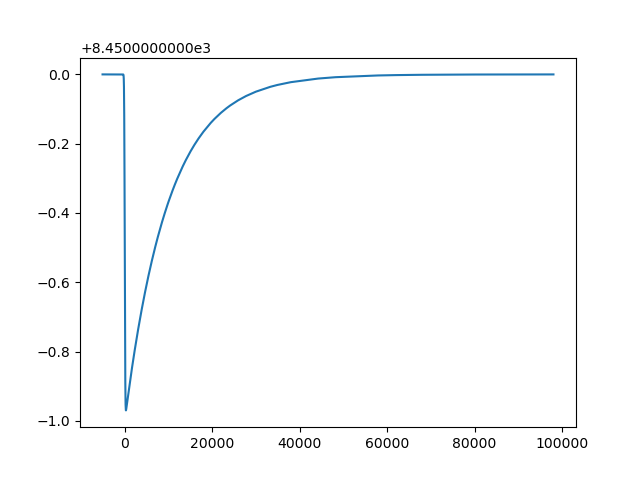

In [619]:
def model_decay_1exp(x, x0, amp_irf, sigma, amp1, tau1, C):
    first_exp  = 0.5*(amp1 * np.exp((x0-x)/tau1 + 0.5*(sigma/tau1)**2)) * (1 + erf((x-(x0+sigma**2/tau1))/sigma*np.sqrt(2)))
    #second_exp = 0.5*(amp2 * np.exp((x0-x)/tau2 + 0.5*(sigma/tau2)**2)) * (1 + erf((x-(x0+sigma**2/tau2))/sigma*np.sqrt(2)))
    third_erf  = amp_irf*erf((x0-x)/(np.sqrt(2)*np.abs(sigma))) 
     
    return C +first_exp + third_erf

test = model_decay_1exp(all_Delay_fs_TT_noNans, 0, 0, 200, -1, 10000, 8450)

plt.figure()
plt.plot(all_Delay_fs_TT_noNans, test)
plt.show()

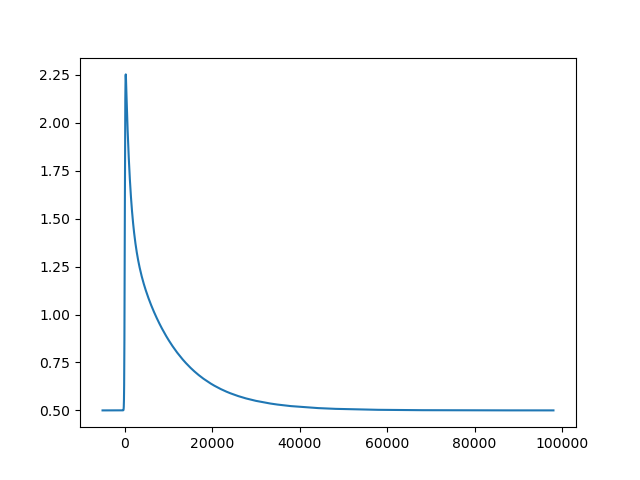

In [646]:
def model_decay_2exp(x, x0, amp_irf, sigma, amp1, tau1, C, amp2, tau2):
    first_exp  = 0.5*(amp1 * np.exp((x0-x)/tau1 + 0.5*(sigma/tau1)**2)) * (1 + erf((x-(x0+sigma**2/tau1))/sigma*np.sqrt(2)))
    second_exp = 0.5*(amp2 * np.exp((x0-x)/tau2 + 0.5*(sigma/tau2)**2)) * (1 + erf((x-(x0+sigma**2/tau2))/sigma*np.sqrt(2)))
    third_erf  = amp_irf*erf((x0-x)/(np.sqrt(2)*np.abs(sigma))) 
     
    return C +first_exp + second_exp + third_erf

test = model_decay_2exp(all_Delay_fs_TT_noNans, 0, 0, 200, 1, 1000, 0.5, 1, 10000)

plt.figure()
plt.plot(all_Delay_fs_TT_noNans, test)
plt.show()

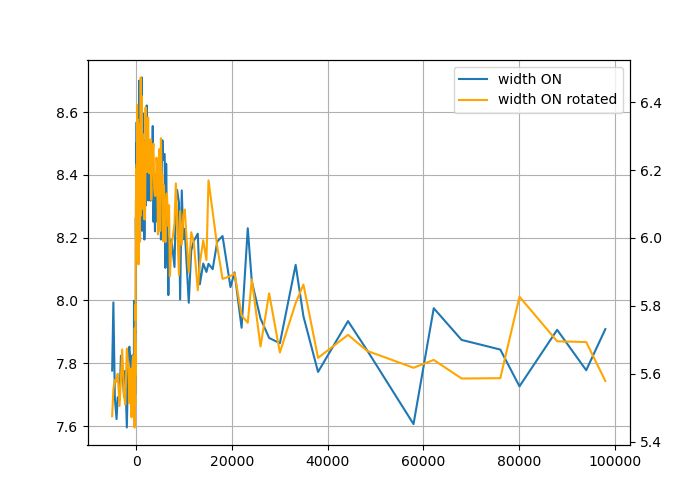

In [460]:
fig = plt.figure(figsize = (7,5))

ax1 = fig.add_subplot(111)
ax2 = plt.twinx(ax1)

lns1 = ax1.plot(all_Delay_fs_TT_noNans, width_on, label = 'width ON')
lns2 = ax2.plot(all_Delay_fs_TT_noNans, width_on_rot, label = 'width ON rotated', color = 'orange')

leg = lns1 + lns2
ax1.grid()
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')



In [ ]:
width_on_rot = np.copy(width_on)

In [75]:
Kb_center_iso = np.copy(center_on)
delay_iso = np.copy(all_Delay_fs_TT)

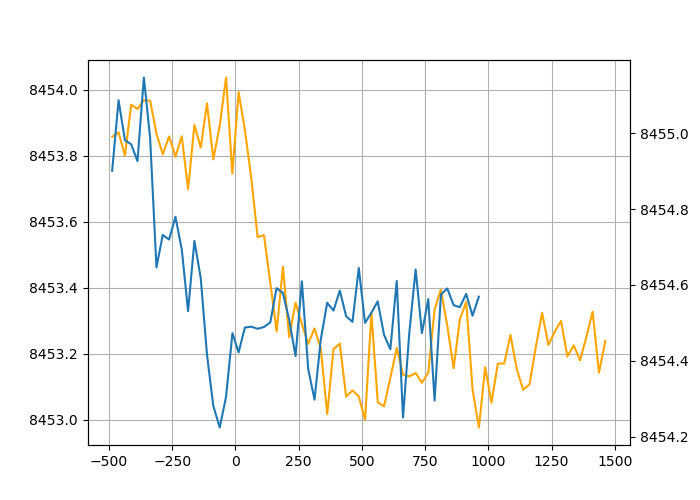

In [97]:
fig = plt.figure(figsize = (7,5))
ax1 = fig.add_subplot(111)
ax2 = plt.twinx(ax1)

ax1.plot(delay_iso, Kb_center_iso, label='2-PrOH', color='orange')
ax2.plot(all_Delay_fs_TT_noNans, center_on, label ='H2O')

ax1.grid()
plt.show()


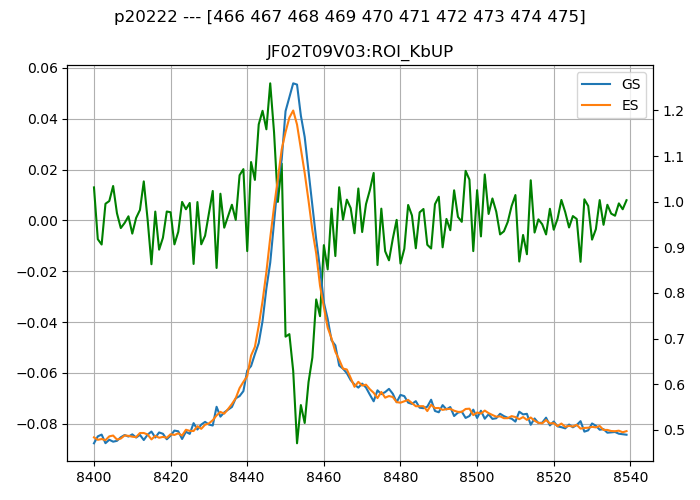

In [113]:
fig = plt.figure(figsize = (7,5))
ax1 = fig.add_subplot(111)
ax2 = plt.twinx(ax1)

plt.suptitle(titlestring_stack)
plt.title(ROI)
ax1.plot(y_axis_rebin, np.average(pp_2D, axis=1), color = 'green')
ax2.plot(y_axis_rebin, np.average(off_2D, axis=1), label = 'GS')
ax2.plot(y_axis_rebin, np.average(on_2D, axis=1),label = 'ES' )


ax1.grid()
plt.legend(loc='best')
plt.xlabel(y_label)
plt.tight_layout()
plt.show()


os.makedirs(savedir, exist_ok=True)
plt.savefig(savedir + '{}_all.png'.format(ROI.split(':')[-1]))

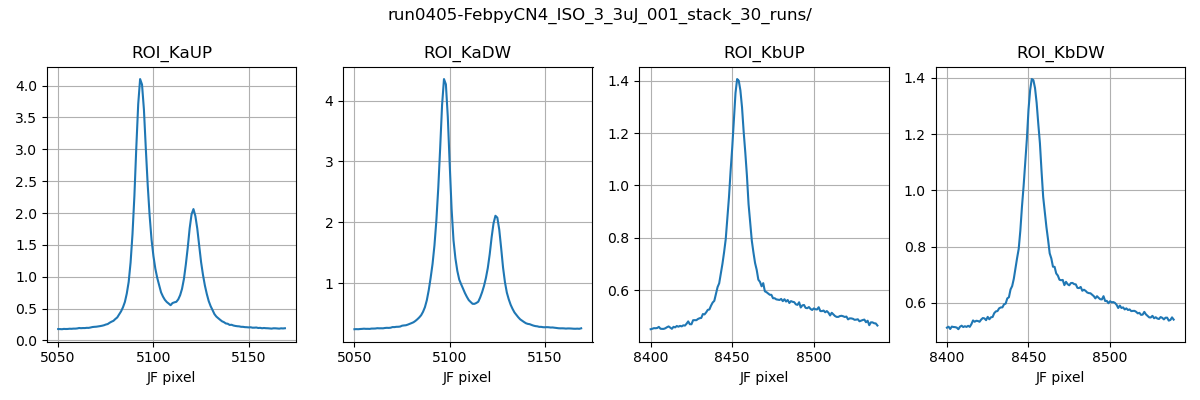

In [181]:
ROIlist = ['JF02T09V03:ROI_KaUP', 'JF02T09V03:ROI_KaDW', 'JF02T09V03:ROI_KbUP', 'JF02T09V03:ROI_KbDW']

bin_ = 1

fig, axs = plt.subplots(nrows=1, ncols=len(ROIlist), figsize=(12,4))
plt.suptitle(titlestring_stack)

for i, (ROI, ax) in enumerate(zip(ROIlist, axs.flatten())):
    matrix_off = s_all_off[ROI]
    yaxis = np.arange(np.array(meta[ROI+'-roi']).flatten()[-2], np.array(meta[ROI+'-roi']).flatten()[-1], 1)
    y_axis_rebin, matrix_off_rebin = plot_tool_static_2D(matrix_off, 0, yaxis, bin_)
    
    ylabel = 'JF pixel'
    
    plt.sca(ax)
    plt.title(ROI.split(':')[-1])
    
    plt.plot(y_axis_rebin, np.average(np.asarray(matrix_off_rebin), axis=0))
    
    plt.xlabel(ylabel)
    plt.grid()    
    
    dat = np.array([y_axis_rebin,  np.average(np.asarray(matrix_off_rebin), axis=0)])
    dat = dat.T
    os.makedirs(savedir, exist_ok=True)
    with open(savedir + '{}.txt'.format(ROI.split(':')[-1]), 'wb') as f:
         np.savetxt(f, dat, delimiter = '\t')
        
plt.tight_layout()

os.makedirs(savedir, exist_ok=True)
plt.savefig(savedir + 'All_ROIs.png')

In [271]:
run1 = ['../Claudio/PNG/run0405-FebpyCN4_ISO_3_3uJ_001_stack_30_runs/']
run2 = ['../Claudio/PNG/run0466-FebpyCN4_ISO_3_4uJ_short_001_stack_10_runs/']
run3 = ['../Claudio/PNG/run0308-FebpyCN4_H20_4uJ_mixGain_stack_34_runs/']

run2load = run1 + run2 + run3

In [272]:
ROI = 'ROI_KaUP'

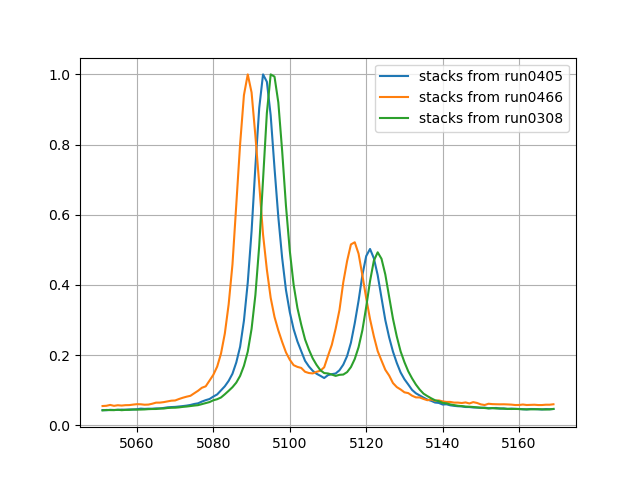

In [273]:
plt.figure()
for run in run2load:
    file = run + ROI + '.txt'
    df = pd.read_csv(file, sep='\t')
    x = df.iloc[:,0]
    y = df.iloc[:,1]
    plt.plot(x, y/np.max(y), label='stacks from {}'.format(run.split('/')[-2].split('-')[0]))
plt.grid()
plt.legend(loc='best')
plt.show()

plt.savefig(savedir + '{}_comparison_GS.png'.format(ROI.split(':')[-1]))

## check stability (dark shots)

In [ ]:
ROI = 'JF02T09V03:ROI_KbUP'
temp_s_off = np.array(s_all_on[ROI])
np.shape(temp_s_off)
numberbins = 1000

specs_off_per_bin = len(temp_s_off) // numberbins
print (specs_off_per_bin)

all_spec_rebin_off  = []
for i in range(numberbins):
    all_spec_rebin_off.append(np.average(temp_s_off[i*specs_off_per_bin:specs_off_per_bin*(i+1),:], axis=0))
all_spec_rebin_off = np.asarray(all_spec_rebin_off)

In [ ]:
plt.figure()
plt.suptitle(titlestring_stack)
plt.title(ROI)
xaxis = np.arange(0,numberbins,1)
yaxis = np.arange(np.array(meta[ROI+'-roi']).flatten()[-2], np.array(meta[ROI+'-roi']).flatten()[-1], 1)
plt.pcolormesh(xaxis, yaxis, np.transpose(all_spec_rebin_off))
plt.ylabel('JF pixel')
plt.show()

os.makedirs(savedir, exist_ok=True)
#plt.savefig(savedir +'{}_check_stability.png'.format(ROI.split(':')[-1]))

In [ ]:
maxpos = []
for index in range(numberbins):
    cut = np.transpose(all_spec_rebin_off)[:,index]
    maxpos.append(np.argmax(cut))
maxpos= np.asarray(maxpos)

plt.figure(figsize = (10,5))
plt.suptitle(titlestring_stack)
plt.title(ROI)
plt.plot(maxpos)
plt.ylabel('JF pixel')
plt.grid()
plt.show()
plt.ylim(35,50)
plt.savefig(savedir +'{}_maxpos.png'.format(ROI.split(':')[-1]))

In [10]:
def get_angle_rotation(ROI, roi2D, fitinf, fitsup, increment):
    from scipy import ndimage
    from lmfit.models import PseudoVoigtModel, VoigtModel, LorentzianModel
    mod = PseudoVoigtModel()
    #roi_rot = np.copy(roi2D)
    angle = np.arange(fitinf, fitsup+increment, increment)
    width = []
    if 'Ka' in ROI:
        liminf = 30
        limsup = 65
    else:
        liminf = 20
        limsup = 90
    for ang in angle:
        roi_rot = ndimage.rotate(roi2D, ang, axes=(0,1))
        line = np.average(roi_rot, axis = 0)
        line2fit = line[liminf:limsup] - np.average(line[0:20])
        axis2fit = np.arange(0, len(line2fit))
        center = np.argmax(line2fit)
        
        pars = mod.guess(line2fit, x=axis2fit)
        init = mod.eval(pars, x=axis2fit)
        out = mod.fit(line2fit, center=center, x=axis2fit)

        width.append(out.params.get('fwhm').value)
    width = np.asarray(width)
    fit_par = np.poly1d(np.polyfit(angle, width, 6))
    fitangle = np.arange(angle[0], angle[-1], 0.01)
    f = fit_par(fitangle)
    
    return angle[np.argmin(width)], fitangle[np.argmin(f)]

In [525]:
def AsymPseudoVoigt(x, x0, amplitude, w0, a, m, slope, C):
    
    w1 = 2*w0/(1+np.exp(-a*(x-x0)))

    a1 = (1-m)*np.sqrt(4*np.log(2)/(np.pi*w1**2))*np.exp(-(x-x0)**2*(4*np.log(2)/w1**2))
    a2 = m*(1/2*np.pi)*(w1/((w1/2)**2+4*x**2))
    offset = slope*(x-x0)+C
    
    Total = amplitude*(a1+a2+offset)
    return Total